### Point 4
For considering the first 10 BookSeries in order of appearance, we use the following for loop:

In [115]:
import re
import os
import csv

In [118]:
top_10_series=[]
for i in range(1,26544):
    if len(top_10_series)==10:
            break
    with open('articles/article_' + str(i) +'.tsv', 'r', encoding="utf-8") as file:
        temp = csv.DictReader(file, delimiter = '\t')
        for row in temp:
            bookseries=row["bookSeries"]
            if bookseries and not re.findall(r'(?<=#)[0-9]?[-–]{1}',bookseries):
                bookseries=bookseries.split("#")[0].strip()
                if bookseries not in top_10_series:
                    top_10_series.append(bookseries)
top_10_series          

['The Hunger Games',
 'Harry Potter',
 'To Kill a Mockingbird',
 'The Twilight Saga',
 "The Hitchhiker's Guide to the Galaxy",
 'Robert Langdon',
 'Divergent',
 'The Mortal Instruments',
 "Ender's Saga",
 'Anne of Green Gables']

Using a regex expression, we are going to exclude the entire book serie (for example The Hunger Games #1-3) and in the dictionary *series_dict* we save the useful information such as: book title, number of pages and publishing date.

In [119]:
series_dict={}
for series in top_10_series:
    series_dict[series]=[]
for i in range(1,26544):
    with open('articles/article_' + str(i) +'.tsv', 'r', encoding="utf-8") as file:
        temp = csv.DictReader(file, delimiter = '\t')
        for row in temp:
            bookseries=row["bookSeries"]
            if bookseries and not re.findall(r'(?<=#)[0-9]?[-–]{1}',bookseries):
                bookseries=bookseries.split("#")[0].strip()
                if bookseries in series_dict:
                       series_dict[bookseries].append((row["bookTitle"],row["NumberOfPages"],row["Publishing_Date"].split()[-1]))

Before the plot, we order the books in every series by date:

In [120]:
for series in series_dict:
    series_dict[series].sort(key=lambda x:x[2])

Now we can build the 2D plot. The x-axis is the years since publication of the first book, the y-axis is the cumulative series page count.

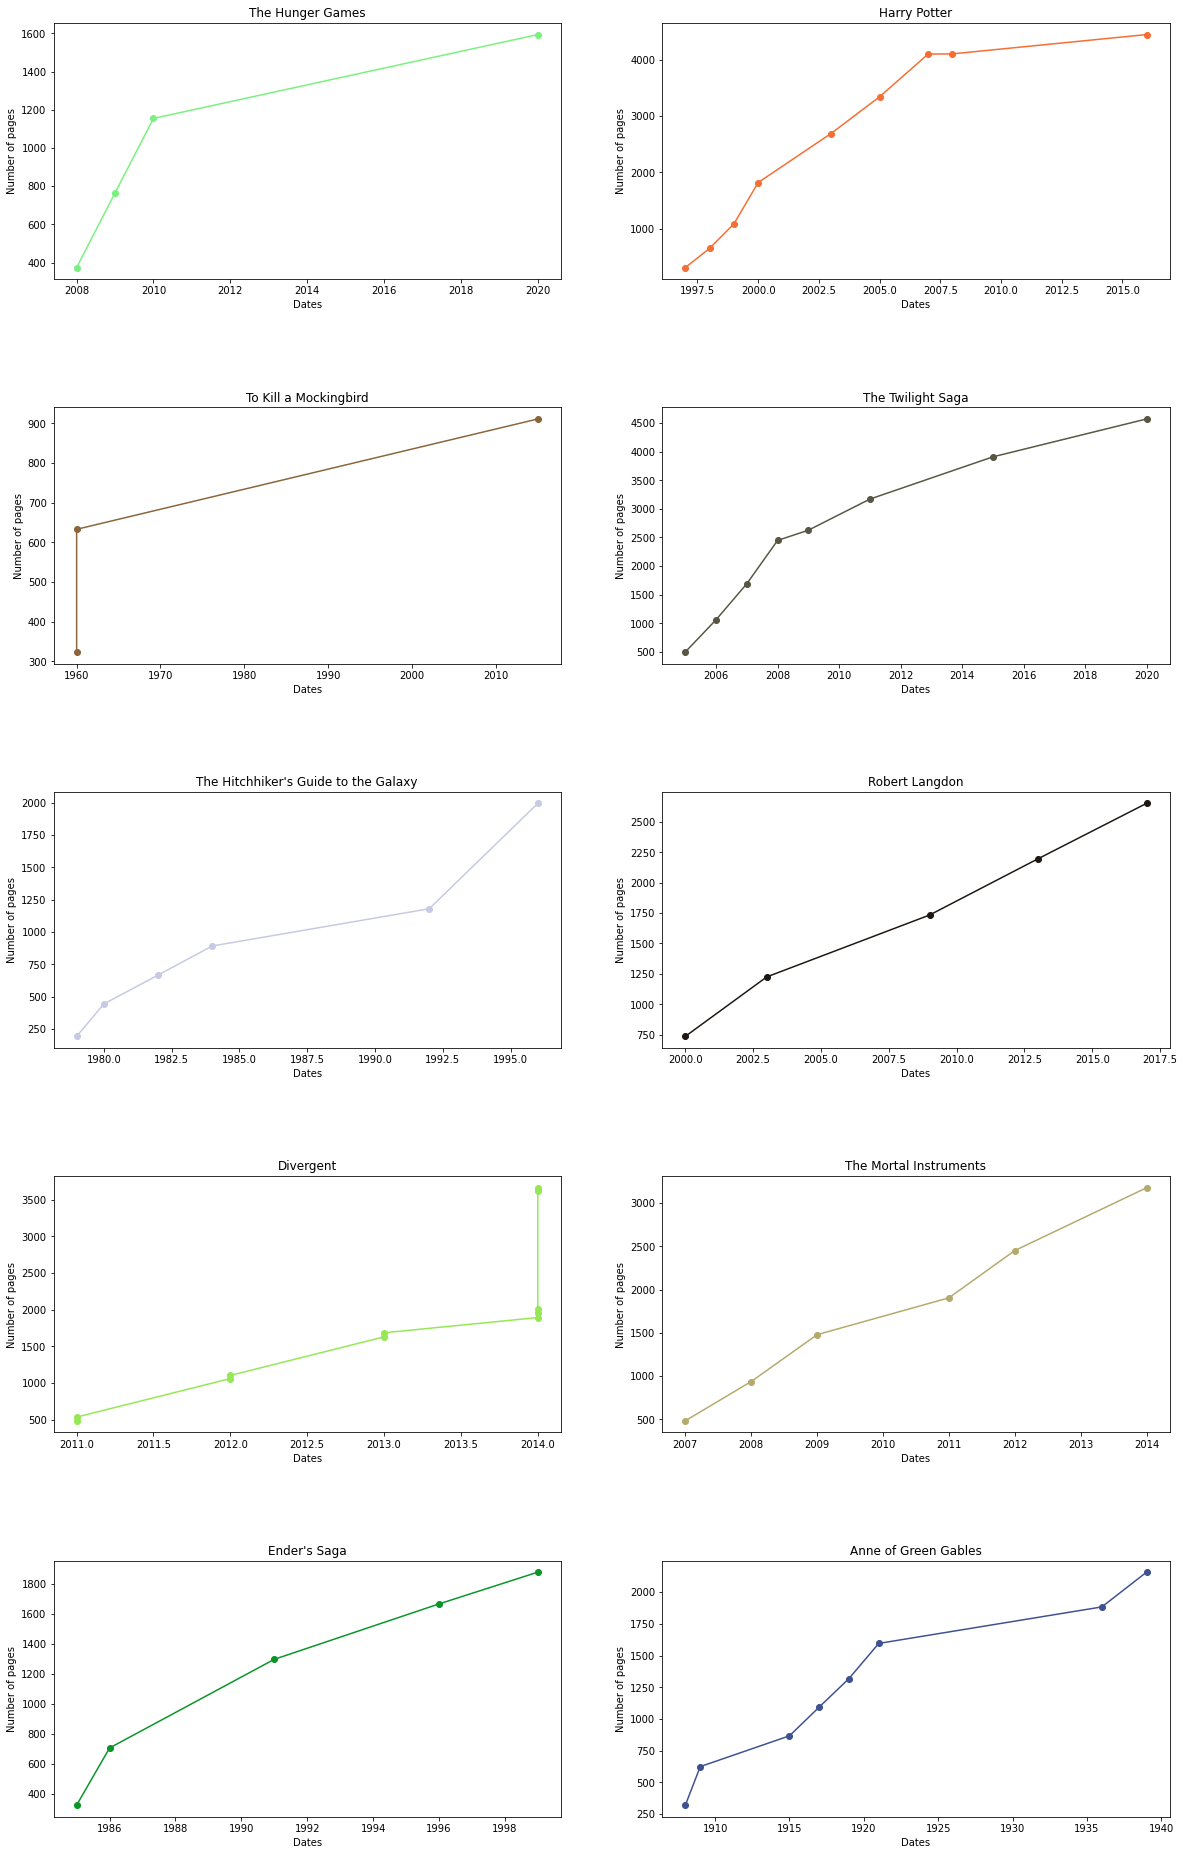

In [121]:
#SPLINE PLOT
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

fig, axs= plt.subplots(5, 2,figsize=(20,33),squeeze=False)
fig.subplots_adjust(hspace=0.5)
n=0 # counter used to assign plots's position 

for bookseries in series_dict:
    book_list=series_dict[bookseries]
    x=[]
    y=[]
    y_cum=0
    for book in book_list:
        x.append(int(book[2]))
        y_cum+=int(book[1])
        y.append(y_cum)
    color = np.random.rand(3)
    axs[int(n/2), n - int(n/2)*2].plot(x, y, 'o', x, y, '-',c=color);
    axs[int(n/2), n-int(n/2)*2].title.set_text(bookseries);
    axs[int(n/2), n-int(n/2)*2].set_xlabel('Dates');
    axs[int(n/2), n-int(n/2)*2].set_ylabel('Number of pages');
    n+=1

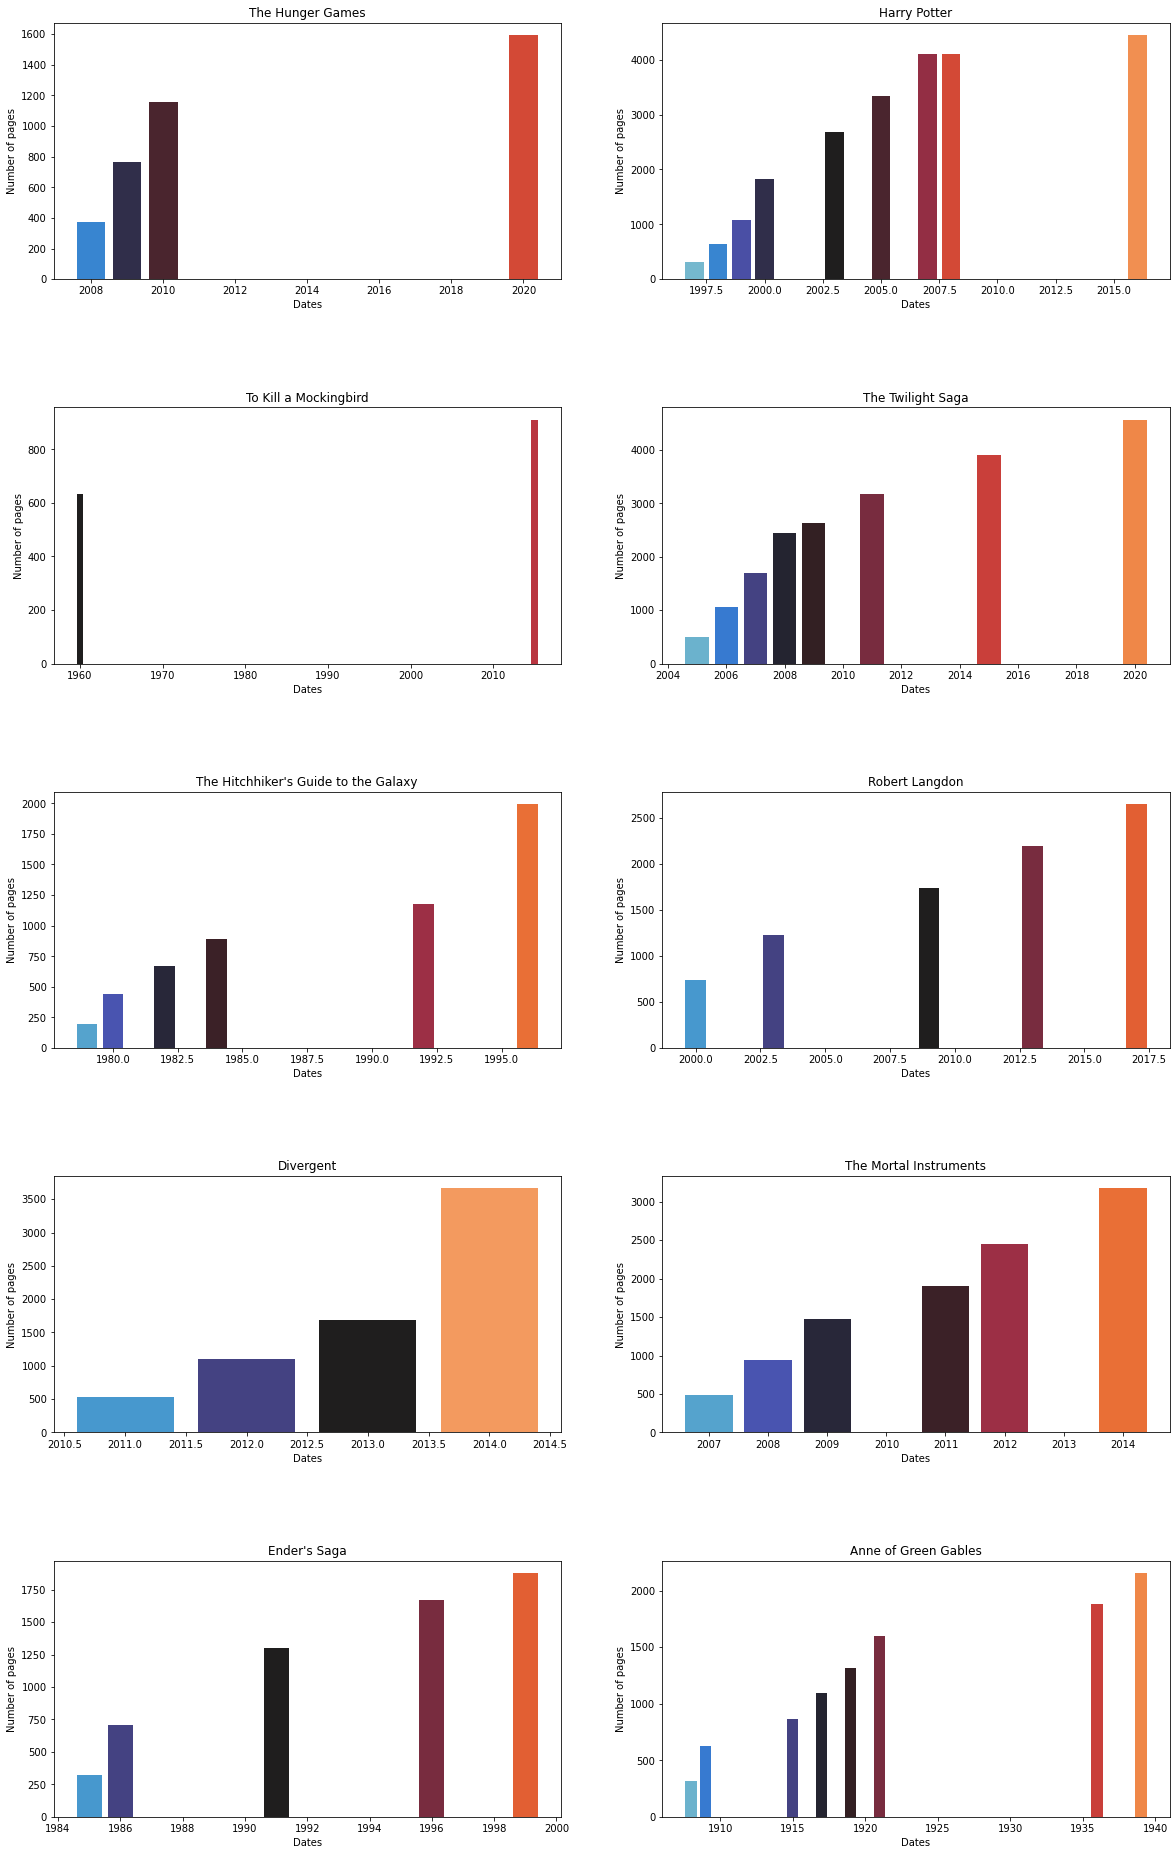

In [122]:
#BAR PLOT
import seaborn as sns
fig, axs= plt.subplots(5, 2,figsize=(20,33),squeeze=False)
fig.subplots_adjust(hspace=0.5)
n=0 # counter used to assign plots' position 
for bookseries in series_dict:
    book_list=series_dict[bookseries]
    x=[]
    y=[]
    y_cum=0
    for book in book_list:
        x.append(int(book[2]))
        y_cum+=int(book[1])
        y.append(y_cum)
    pal = sns.color_palette("icefire",len(y))
    axs[int(n/2), n - int(n/2)*2].bar(x,y,color = pal);
    axs[int(n/2), n-int(n/2)*2].title.set_text(bookseries);
    axs[int(n/2), n-int(n/2)*2].set_xlabel('Dates');
    axs[int(n/2), n-int(n/2)*2].set_ylabel('Number of pages');
    n+=1